
# Project: E-Commerce Business Intelligence Analysis for VS Group

### This project focuses on Sprint 1 of a Business Intelligence analysis for VS Group, a U.S.-based e-commerce company. The goal is to design and create a relational SQL database from the provided sales dataset. Tasks include structuring tables, defining primary and foreign keys, cleaning and transforming the data, populating the database using Python and SQLite, and performing SQL queries to answer business questions such as top-selling products, revenue by category, and unique customer counts. This work demonstrates core BI skills in database design, data preparation, and SQL implementation.



# Import

In [173]:
import pandas as pd

### When needed I created a code to show all rows of the output. 

In [116]:
# # Show all rows
# pd.set_option('display.max_rows', None)

# # Show all columns as well, if needed
# pd.set_option('display.max_columns', None)

In [117]:
original_csv = pd.read_csv('Sample-Superstore.csv', encoding='windows-1252')

In [118]:
original_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [119]:
original_csv.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Cleaning

### I started by removing space on the column names

In [120]:
updated_csv = original_csv
# updated_csv = updated_csv.rename(str.l, axis=1)
updated_csv.columns
updated_csv.columns = [x.replace(' ', '') for x in updated_csv.columns]
updated_csv.columns = [x.replace('-', '') for x in updated_csv.columns]
updated_csv.columns
# updated_csv['supplier_price'] = updated_csv['sales'] / updated_csv['quantity'] - updated_csv['profit'] / updated_csv['quantity'] - updated_csv['sales'] * updated_csv['discount']

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'SubCategory', 'ProductName',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### I created a Supplier Price Column

In [121]:
#### My main problem was that I was applying the discount but this was already taken into consideration with the Sales Price. 

updated_csv["SupplierPrice"] = (
    (updated_csv["Sales"] - updated_csv["Profit"]) / updated_csv["Quantity"]
)
updated_csv

updated_csv.rename(columns={'Sales':'SalePrice'}, inplace=True)
updated_csv.head(2)


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Region,ProductID,Category,SubCategory,ProductName,SalePrice,Quantity,Discount,Profit,SupplierPrice
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,110.0232
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,170.7860


### Updated column order for Supplier Price to be first to be read easily. 

In [122]:
new_order = [
    'RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
    'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
    'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
    'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount', 'Profit'
]

updated_csv = updated_csv[new_order]
updated_csv.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'SubCategory', 'ProductName',
       'SupplierPrice', 'Quantity', 'SalePrice', 'Discount', 'Profit'],
      dtype='object')

### Checking categories and subcategories pairs to create CHECK constrain on Product table to avoid typos and human error in the future. 

In [123]:
unique_categories = updated_csv["Category"].unique()
print("Unique Categories:")
print(unique_categories)

# Show unique subcategories
unique_subcategories = updated_csv["SubCategory"].unique()
print("\nUnique SubCategories:")
print(unique_subcategories)

unique_pairs = updated_csv[["Category", "SubCategory"]].drop_duplicates()
print("\nCategory → SubCategory pairs:")
print(unique_pairs)


Unique Categories:
['Furniture' 'Office Supplies' 'Technology']

Unique SubCategories:
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']

Category → SubCategory pairs:
            Category  SubCategory
0          Furniture    Bookcases
1          Furniture       Chairs
2    Office Supplies       Labels
3          Furniture       Tables
4    Office Supplies      Storage
5          Furniture  Furnishings
6    Office Supplies          Art
7         Technology       Phones
8    Office Supplies      Binders
9    Office Supplies   Appliances
12   Office Supplies        Paper
26        Technology  Accessories
30   Office Supplies    Envelopes
53   Office Supplies    Fasteners
138  Office Supplies     Supplies
165       Technology     Machines
335       Technology      Copiers


### Create AddressID

#### Created an AddressID as some clients have more than one address. 
#### Started by creating Lookup table with Unique addresses

In [124]:
df_address = updated_csv[['Country', 'City', 'State', 'PostalCode', 'Region']].copy()
df_address
df_address_unique = df_address.drop_duplicates(subset=['Country', 'City', 'State', 'PostalCode', 'Region']).reset_index(drop=True)
df_address_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     632 non-null    object
 1   City        632 non-null    object
 2   State       632 non-null    object
 3   PostalCode  632 non-null    int64 
 4   Region      632 non-null    object
dtypes: int64(1), object(4)
memory usage: 24.8+ KB


#### Then I created a new column with Address ID

In [125]:
df_address_unique['AddressID'] = [
    f"{i:03d}" for i in range(1, len(df_address_unique) + 1)
]
df_address_unique


,Country,City,State,PostalCode,Region,AddressID
0,United States,Henderson,Kentucky,42420,South,001
1,United States,Los Angeles,California,90036,West,002
2,United States,Fort Lauderdale,Florida,33311,South,003
3,United States,Los Angeles,California,90032,West,004
4,United States,Concord,North Carolina,28027,South,005
...,...,...,...,...,...,...
627,United States,Springdale,Arkansas,72762,South,628
628,United States,Lodi,California,95240,West,629
629,United States,La Porte,Texas,77571,Central,630
630,United States,Mason,Ohio,45040,East,631


#### Now I Merged Address ID into main CSV

In [126]:
updated_csv = updated_csv.merge(
    df_address_unique,
    on=['Country', 'City', 'State', 'PostalCode', 'Region'],
    how='left'
)
updated_csv

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,ProductID,Category,SubCategory,ProductName,SupplierPrice,Quantity,SalePrice,Discount,Profit,AddressID
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,110.0232,2,261.9600,0.00,41.9136,001
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",170.7860,3,731.9400,0.00,219.5820,001
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,3.8743,2,14.6200,0.00,6.8714,002
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,268.1217,5,957.5775,0.45,-383.0310,003
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,9.9258,2,22.3680,0.20,2.5164,003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,7.0484,3,25.2480,0.20,4.1028,124
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,38.1634,2,91.9600,0.00,15.6332,147
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,119.5914,2,258.5760,0.20,19.3932,147
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4.0700,4,29.6000,0.00,13.3200,147


#### Created New column order with AddressID in the right place. 

In [127]:
new_order2 = [
    'RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
    'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
    'PostalCode', 'Region', 'AddressID', 'ProductID', 'Category', 'SubCategory',
    'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount', 'Profit'
]

updated_csv = updated_csv[new_order2]
updated_csv

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,AddressID,ProductID,Category,SubCategory,ProductName,SupplierPrice,Quantity,SalePrice,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,001,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,110.0232,2,261.9600,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,001,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",170.7860,3,731.9400,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,002,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,3.8743,2,14.6200,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,003,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,268.1217,5,957.5775,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,003,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,9.9258,2,22.3680,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,124,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,7.0484,3,25.2480,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,147,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,38.1634,2,91.9600,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,147,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,119.5914,2,258.5760,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,147,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4.0700,4,29.6000,0.00,13.3200


### For easier math management I Rounded Numbers to 2 decimals. 

In [128]:
# Round only the key numeric columns
updated_csv["SupplierPrice"] = updated_csv["SupplierPrice"].round(2)
updated_csv["SalePrice"] = updated_csv["SalePrice"].round(2)
updated_csv["Profit"] = updated_csv["Profit"].round(2)

# Optional: check
updated_csv[["OrderID", "ProductID", "AddressID", "SupplierPrice", "SalePrice", "Profit"]].head(20)


,OrderID,ProductID,AddressID,SupplierPrice,SalePrice,Profit
0,CA-2016-152156,FUR-BO-10001798,001,110.02,261.96,41.91
1,CA-2016-152156,FUR-CH-10000454,001,170.79,731.94,219.58
2,CA-2016-138688,OFF-LA-10000240,002,3.87,14.62,6.87
3,US-2015-108966,FUR-TA-10000577,003,268.12,957.58,-383.03
4,US-2015-108966,OFF-ST-10000760,003,9.93,22.37,2.52
5,CA-2014-115812,FUR-FU-10001487,004,4.96,48.86,14.17
6,CA-2014-115812,OFF-AR-10002833,004,1.33,7.28,1.97
7,CA-2014-115812,TEC-PH-10002275,004,136.07,907.15,90.72
8,CA-2014-115812,OFF-BI-10003910,004,4.24,18.50,5.78
9,CA-2014-115812,OFF-AP-10002892,004,16.09,114.90,34.47


In [129]:
updated_csv.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'AddressID', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount',
       'Profit'],
      dtype='object')

### Merge Same OrderID, ProductID, AddressID
#### Looks like some orders are identical but differ on quantity, so for those orders I created a merge. (Please note that Discount has to be the same too, if discount is different then they were kept separate)

In [130]:
updated_csv = updated_csv.groupby(
    ["OrderID", "ProductID", "AddressID", "Discount"], as_index=False
).agg({
    "RowID": "first",
    "OrderDate": "first",
    "ShipDate": "first",
    "ShipMode": "first",
    "CustomerID": "first",
    "CustomerName": "first",
    "Segment": "first",
    "Country": "first",
    "City": "first",
    "State": "first",
    "PostalCode": "first",
    "Region": "first",
    "AddressID": "first",
    "ProductID": "first",
    "Category": "first",
    "SubCategory": "first",
    "ProductName": "first",
    "SupplierPrice": "first",
    "Quantity": "sum",
    "SalePrice": "sum",
    "Discount": "first",
    "Profit": "sum"
})

# Optional: inspect
updated_csv.head(20)


,OrderID,RowID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,AddressID,ProductID,Category,SubCategory,ProductName,SupplierPrice,Quantity,SalePrice,Discount,Profit
0,CA-2014-100006,2718,9/7/2014,9/13/2014,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,024,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,89.45,3,377.97,0.0,109.61
1,CA-2014-100090,6288,7/8/2014,7/12/2014,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,035,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,196.81,3,502.49,0.2,-87.94
2,CA-2014-100090,6289,7/8/2014,7/12/2014,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,035,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",21.31,6,196.70,0.2,68.85
3,CA-2014-100293,9515,3/14/2014,3/18/2014,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,...,134,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,9.86,6,91.06,0.2,31.87
4,CA-2014-100328,3084,1/28/2014,2/3/2014,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,024,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",2.60,1,3.93,0.2,1.33
5,CA-2014-100363,3836,4/8/2014,4/15/2014,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,...,277,OFF-FA-10000611,Office Supplies,Fasteners,Binder Clips by OIC,0.77,2,2.37,0.2,0.83
6,CA-2014-100363,3837,4/8/2014,4/15/2014,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,...,277,OFF-PA-10004733,Office Supplies,Paper,Things To Do Today Spiral Book,4.04,3,19.01,0.2,6.89
7,CA-2014-100391,9441,5/25/2014,5/29/2014,Standard Class,BW-11065,Barry Weirich,Consumer,United States,New York City,...,046,OFF-PA-10001471,Office Supplies,Paper,Strathmore Photo Frame Cards,3.95,2,14.62,0.0,6.73
8,CA-2014-100678,6570,4/18/2014,4/22/2014,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Houston,...,015,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,111.73,3,317.06,0.3,-18.12
9,CA-2014-100678,6569,4/18/2014,4/22/2014,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Houston,...,015,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,0.84,2,2.69,0.2,1.01


## Create Year and Month Columns
### Needed to create a Year and MOnth column for excercise 7

In [131]:
updated_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        9986 non-null   object 
 1   RowID          9986 non-null   int64  
 2   OrderDate      9986 non-null   object 
 3   ShipDate       9986 non-null   object 
 4   ShipMode       9986 non-null   object 
 5   CustomerID     9986 non-null   object 
 6   CustomerName   9986 non-null   object 
 7   Segment        9986 non-null   object 
 8   Country        9986 non-null   object 
 9   City           9986 non-null   object 
 10  State          9986 non-null   object 
 11  PostalCode     9986 non-null   int64  
 12  Region         9986 non-null   object 
 13  AddressID      9986 non-null   object 
 14  ProductID      9986 non-null   object 
 15  Category       9986 non-null   object 
 16  SubCategory    9986 non-null   object 
 17  ProductName    9986 non-null   object 
 18  Supplier

In [132]:
updated_csv['OrderDate'] = pd.to_datetime(updated_csv['OrderDate'])


In [133]:
updated_csv['OrderYear'] = updated_csv['OrderDate'].dt.year
updated_csv['OrderMonth'] = updated_csv['OrderDate'].dt.month

# Export Main csv

In [134]:
updated_csv.to_csv("updated_csv.csv", index=False)


# Create Tables

In [135]:
# import sqlite3

# conn = sqlite3.connect("Ecommerce.db")
# cur = conn.cursor()

# # Customers table
# create_customers_table = """
#     CREATE TABLE IF NOT EXISTS Customers (
#         CustomerID TEXT PRIMARY KEY,
#         CustomerName TEXT,
#         Segment TEXT,
#         AddressID INTEGER,
#         FOREIGN KEY (AddressID) REFERENCES Address(AddressID)
#     )
# """

# # Orders table
# create_orders_table = """
#     CREATE TABLE IF NOT EXISTS Orders (
#         OrderID TEXT,
#         OrderDate TEXT,
#         OrderYear TEXT, 
#         OrderMonth TEXT,
#         CustomerID TEXT,
#         PRIMARY KEY (OrderID),
#         FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
#     )
# """

# # Shipping table
# create_shipping_table = """
#     CREATE TABLE IF NOT EXISTS Shipping (
#         OrderID TEXT PRIMARY KEY,
#         OrderDate TEXT,
#         ShipDate TEXT, 
#         ShipMode TEXT,
#         AddressID TEXT,
#         FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
#         FOREIGN KEY (AddressID) REFERENCES Address(AddressID)
#     )
# """

# # Address table (CustomerID removed)
# create_address_table = """
#     CREATE TABLE IF NOT EXISTS Address (
#         AddressID TEXT PRIMARY KEY,
#         Country TEXT,
#         City TEXT,
#         State TEXT,
#         PostalCode INTEGER,
#         Region TEXT
#     )
# """

# # Products table
# create_products_table = """
#     CREATE TABLE IF NOT EXISTS Products (
#         ProductID TEXT PRIMARY KEY,
#         Category TEXT,
#         SubCategory TEXT,
#         ProductName TEXT
#     )
# """

# # Sales table (composite primary key)
# create_sales_table = """
#     CREATE TABLE IF NOT EXISTS Sales (
#         OrderID TEXT,
#         ProductID TEXT,
#         SupplierPrice REAL,
#         SalePrice REAL,
#         Quantity REAL,
#         Discount REAL,
#         Profit REAL,
#         PRIMARY KEY (OrderID, ProductID),
#         FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
#         FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
#     )
# """

# # Execute
# cur.execute(create_customers_table)
# cur.execute(create_orders_table)
# cur.execute(create_shipping_table)
# cur.execute(create_address_table)
# cur.execute(create_products_table)
# cur.execute(create_sales_table)

# cur.close()
# conn.close()


In [136]:
import sqlite3

conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# Customers table
create_customers_table = """
    CREATE TABLE IF NOT EXISTS Customers (
        CustomerID INTEGER PRIMARY KEY,
        CustomerName TEXT,
        Segment TEXT
    )
"""

# Orders table
create_orders_table = """
    CREATE TABLE IF NOT EXISTS Orders (
        OrderID INTEGER PRIMARY KEY,
        OrderDate DATE,
        OrderYear TEXT,
        OrderMonth TEXT,
        CustomerID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
    )
"""

# Shipping table
create_shipping_table = """
    CREATE TABLE IF NOT EXISTS Shipping (
        OrderID INTEGER PRIMARY KEY,
        OrderDate DATE,
        ShipDate DATE, 
        ShipMode TEXT,
        AddressID INTEGER,
        FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
        FOREIGN KEY (AddressID) REFERENCES Address(AddressID)
    )
"""

# Address table
create_address_table = """
    CREATE TABLE IF NOT EXISTS Address (
        AddressID INTEGER PRIMARY KEY,
        Country TEXT,
        City TEXT,
        State TEXT,
        PostalCode INTEGER,
        Region TEXT,
        CustomerID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
    )
"""

# Products table with CHECK constraints (from your CSV!)
create_products_table = """
    CREATE TABLE IF NOT EXISTS Products (
        ProductID INTEGER PRIMARY KEY,
        Category TEXT NOT NULL,
        SubCategory TEXT NOT NULL,
        ProductName TEXT,
        CHECK (Category IN ('Technology', 'Furniture', 'Office Supplies')),
        CHECK (
            (Category = 'Technology' AND SubCategory IN ('Phones', 'Accessories', 'Machines', 'Copiers')) OR
            (Category = 'Furniture' AND SubCategory IN ('Tables', 'Chairs', 'Furnishings', 'Bookcases')) OR
            (Category = 'Office Supplies' AND SubCategory IN ('Binders', 'Paper', 'Fasteners', 'Art', 'Envelopes', 'Labels', 'Storage', 'Appliances', 'Supplies'))
        )
    )
"""

# Sales table (composite primary key)
create_sales_table = """
    CREATE TABLE IF NOT EXISTS Sales (
        OrderID INTEGER,
        ProductID INTEGER,
        SupplierPrice REAL,
        SalePrice REAL,
        Quantity REAL,
        Discount REAL,
        Profit REAL,
        PRIMARY KEY (OrderID, ProductID),
        FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
        FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
    )
"""

# Execute all
cur.execute(create_customers_table)
cur.execute(create_orders_table)
cur.execute(create_shipping_table)
cur.execute(create_address_table)
cur.execute(create_products_table)
cur.execute(create_sales_table)

cur.close()
conn.close()


# CSV's for Tables

In [137]:
customers = updated_csv[["CustomerID", "CustomerName", "Segment", "AddressID"]].copy()
customers = customers.drop_duplicates(subset='CustomerID')
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 8884
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    793 non-null    object
 1   CustomerName  793 non-null    object
 2   Segment       793 non-null    object
 3   AddressID     793 non-null    object
dtypes: object(4)
memory usage: 31.0+ KB


In [138]:
customers.to_csv("customers.csv", index=False)


In [139]:
orders = updated_csv[["OrderID", "OrderDate", "OrderYear", "OrderMonth", "CustomerID"]].copy()
orders = orders.drop_duplicates(subset='OrderID')
orders.info()
orders.head()




<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9980
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     5009 non-null   object        
 1   OrderDate   5009 non-null   datetime64[ns]
 2   OrderYear   5009 non-null   int32         
 3   OrderMonth  5009 non-null   int32         
 4   CustomerID  5009 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 195.7+ KB


,OrderID,OrderDate,OrderYear,OrderMonth,CustomerID
0,CA-2014-100006,2014-09-07,2014,9,DK-13375
1,CA-2014-100090,2014-07-08,2014,7,EB-13705
3,CA-2014-100293,2014-03-14,2014,3,NF-18475
4,CA-2014-100328,2014-01-28,2014,1,JC-15340
5,CA-2014-100363,2014-04-08,2014,4,JM-15655


In [140]:
orders.to_csv("orders.csv", index=False)


In [141]:
shipping = updated_csv[["OrderID", "OrderDate", "ShipDate", "ShipMode", "AddressID"]].copy()
shipping = shipping.drop_duplicates(subset='OrderID')
shipping.info()
shipping.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9980
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    5009 non-null   object        
 1   OrderDate  5009 non-null   datetime64[ns]
 2   ShipDate   5009 non-null   object        
 3   ShipMode   5009 non-null   object        
 4   AddressID  5009 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 234.8+ KB


,OrderID,OrderDate,ShipDate,ShipMode,AddressID
0,CA-2014-100006,2014-09-07,9/13/2014,Standard Class,024
1,CA-2014-100090,2014-07-08,7/12/2014,Standard Class,035
3,CA-2014-100293,2014-03-14,3/18/2014,Standard Class,134
4,CA-2014-100328,2014-01-28,2/3/2014,Standard Class,024
5,CA-2014-100363,2014-04-08,4/15/2014,Standard Class,277


In [142]:
shipping.to_csv("shipping.csv", index=False)


In [143]:
address = updated_csv[["AddressID", "Country", "City", "State", "PostalCode", "Region"]].copy()
address = address.drop_duplicates(subset="AddressID")
address.info()
address.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 0 to 9974
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AddressID   632 non-null    object
 1   Country     632 non-null    object
 2   City        632 non-null    object
 3   State       632 non-null    object
 4   PostalCode  632 non-null    int64 
 5   Region      632 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.6+ KB


,AddressID,Country,City,State,PostalCode,Region
0,024,United States,New York City,New York,10024,East
1,035,United States,San Francisco,California,94122,West
3,134,United States,Jacksonville,Florida,32216,South
5,277,United States,Glendale,Arizona,85301,West
7,046,United States,New York City,New York,10035,East


In [144]:
address.to_csv("address.csv", index=False)


In [145]:
products = updated_csv[["ProductID", "Category", "SubCategory", "ProductName"]].copy()
products = products.drop_duplicates(subset="ProductID")
products.info()
products.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 9970
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    1862 non-null   object
 1   Category     1862 non-null   object
 2   SubCategory  1862 non-null   object
 3   ProductName  1862 non-null   object
dtypes: object(4)
memory usage: 72.7+ KB


,ProductID,Category,SubCategory,ProductName
0,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT
1,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table
2,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ..."
3,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887
4,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x..."


In [146]:
products.to_csv("products.csv", index=False)


In [147]:
sales = updated_csv[["OrderID", "ProductID", "SupplierPrice", "SalePrice", "Quantity", "Discount", "Profit"]].copy()
# sales = sales.drop_duplicates(subset="OrderID")
sales.info()
sales.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        9986 non-null   object 
 1   ProductID      9986 non-null   object 
 2   SupplierPrice  9986 non-null   float64
 3   SalePrice      9986 non-null   float64
 4   Quantity       9986 non-null   int64  
 5   Discount       9986 non-null   float64
 6   Profit         9986 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 546.2+ KB


,OrderID,ProductID,SupplierPrice,SalePrice,Quantity,Discount,Profit
0,CA-2014-100006,TEC-PH-10002075,89.45,377.97,3,0.0,109.61
1,CA-2014-100090,FUR-TA-10003715,196.81,502.49,3,0.2,-87.94
2,CA-2014-100090,OFF-BI-10001597,21.31,196.70,6,0.2,68.85
3,CA-2014-100293,OFF-PA-10000176,9.86,91.06,6,0.2,31.87
4,CA-2014-100328,OFF-BI-10000343,2.60,3.93,1,0.2,1.33


In [148]:
sales.to_csv("sales.csv", index=False)


# Populate Tables

In [149]:
conn = sqlite3.connect("Ecommerce.db")

customers.to_sql(
    "Customers", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()


In [150]:
conn = sqlite3.connect("Ecommerce.db")

orders.to_sql(
    "Orders", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()

In [151]:
conn = sqlite3.connect("Ecommerce.db")

shipping.to_sql(
    "Shipping", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()

In [152]:
conn = sqlite3.connect("Ecommerce.db")

address.to_sql(
    "Address", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()

In [153]:
conn = sqlite3.connect("Ecommerce.db")

products.to_sql(
    "Products", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()

In [154]:
conn = sqlite3.connect("Ecommerce.db")

sales.to_sql(
    "Sales", # the name of the table
    con=conn, # the connection variable
    index=False, # whether to include the index column
    if_exists="replace" # define behavior if table already exists
)

conn.close()

## Database Diagram

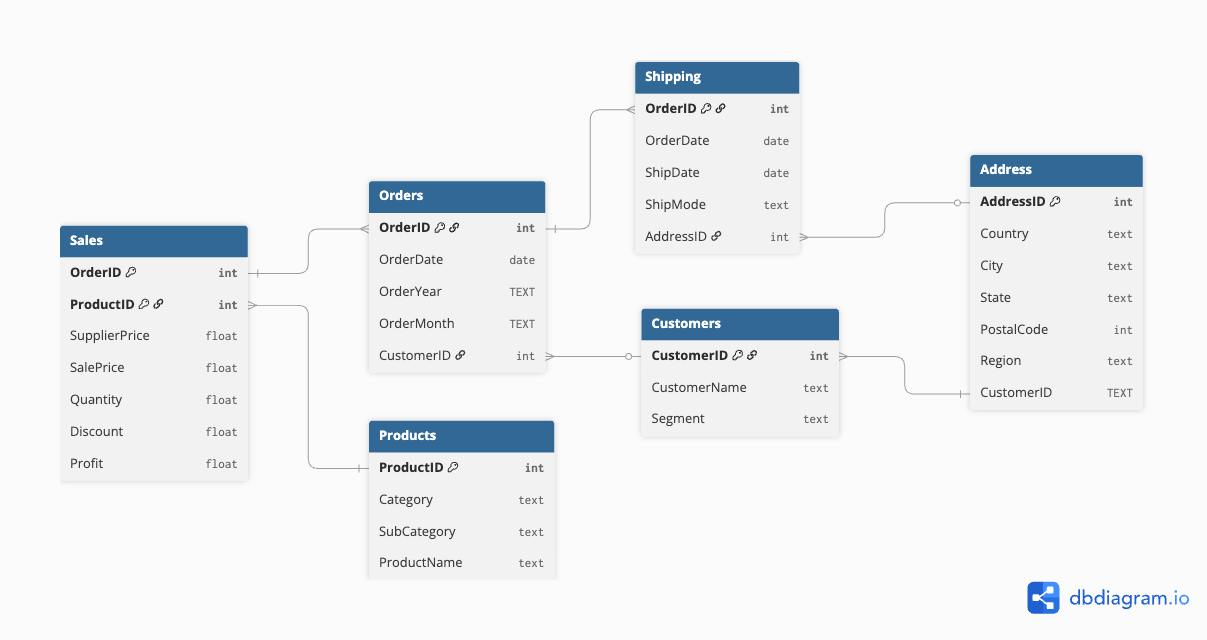

In [174]:
from IPython.display import Image
Image("/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module02/DataBase E-Commerce.png")


# Queries

## Question 1 

### What is the category generating the maximum sales revenue?

In [155]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_maxsales = """
    SELECT p.Category, SUM(s.SalePrice) as SalePriceSum
    FROM Products as p
    JOIN Sales as s on s.ProductID=p.ProductID
    GROUP BY p.Category
    ORDER BY SalePriceSum DESC
    LIMIT 1;
"""

cur.execute(select_maxsales)
rows = cur.fetchall()

maxsales_df = pd.DataFrame(rows, columns=["Category", "s.SalePrice"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

maxsales_df



(1862,)


,Category,s.SalePrice
0,Technology,836154.02


### What about the profit in this category?


In [156]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_maxsales = """
    SELECT p.Category, SUM(s.Profit) as ProfitSum
    FROM Products as p
    JOIN Sales as s on s.ProductID=p.ProductID
    GROUP BY p.Category
    Order BY ProfitSum DESC
    LIMIT 1
"""

cur.execute(select_maxsales)
rows = cur.fetchall()

maxsales_df = pd.DataFrame(rows, columns=["Category", "s.Profit"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

maxsales_df



(1862,)


,Category,s.Profit
0,Technology,145455.44


### Are they making a loss in any categories or subcategories?

#### Cheking Categories

In [157]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_maxsales = """
    SELECT p.Category, SUM(s.Profit) as ProfitSum
    FROM Products as p
    JOIN Sales as s on s.ProductID=p.ProductID
    GROUP BY p.Category
    Having ProfitSum < 0
"""

cur.execute(select_maxsales)
rows = cur.fetchall()

maxsales_df = pd.DataFrame(rows, columns=["Category", "s.Profit"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

maxsales_df



(1862,)


,Category,s.Profit


### Checkign Subcategories

In [158]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_maxsales = """
    SELECT p.SubCategory, SUM(s.Profit) as ProfitSum
    FROM Products as p
    JOIN Sales as s on s.ProductID=p.ProductID
    GROUP BY p.SubCategory
    Having ProfitSum < 0
"""

cur.execute(select_maxsales)
rows = cur.fetchall()

maxsales_df = pd.DataFrame(rows, columns=["Category", "s.Profit"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

maxsales_df



(1862,)


,Category,s.Profit
0,Bookcases,-3472.59
1,Supplies,-1189.08
2,Tables,-17725.57


### Checkign all Subcategories are on profit

In [159]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_maxsales = """
    SELECT p.SubCategory, SUM(s.Profit) as ProfitSum
    FROM Products as p
    JOIN Sales as s on s.ProductID=p.ProductID
    GROUP BY p.SubCategory
    Having ProfitSum > 0
"""

cur.execute(select_maxsales)
rows = cur.fetchall()

maxsales_df = pd.DataFrame(rows, columns=["Category", "s.Profit"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

maxsales_df



(1862,)


,Category,s.Profit
0,Accessories,41936.78
1,Appliances,18137.99
2,Art,6527.84
3,Binders,30221.48
4,Chairs,26590.08
5,Copiers,55617.88
6,Envelopes,6964.06
7,Fasteners,949.52
8,Furnishings,13059.18
9,Labels,5546.18


## Question 2

### What are 5 states generating the maximum and minimum sales revenue?

In [160]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_statesrevenue = """
    SELECT a.State, SUM(s.SalePrice) SalesSum
    FROM Address as a
    JOIN Shipping as ship on a.AddressID=ship.AddressID
    JOIN Sales as s on s.OrderID=ship.OrderID
    GROUP BY a.State
    ORDER BY SalesSum DESC
    LIMIT 5
"""

cur.execute(select_statesrevenue)
rows = cur.fetchall()

statesrevenue_df = pd.DataFrame(rows, columns=["a.State", "s.SalePrice"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

statesrevenue_df



(1862,)


,a.State,s.SalePrice
0,California,457687.62
1,New York,310876.20
2,Texas,170187.91
3,Washington,138641.29
4,Pennsylvania,116511.98


In [161]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

select_statesrevenue = """
    SELECT a.State, SUM(s.SalePrice) as SalesSum
    FROM Address as a
    JOIN Shipping as ship on a.AddressID=ship.AddressID
    JOIN Sales as s on s.OrderID=ship.OrderID
    GROUP BY a.State
    ORDER BY SalesSum ASC
    LIMIT 5
"""

cur.execute(select_statesrevenue)
rows = cur.fetchall()

statesrevenue_df = pd.DataFrame(rows, columns=["a.State", "s.SalePrice"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

statesrevenue_df



(1862,)


,a.State,s.SalePrice
0,North Dakota,919.91
1,West Virginia,1209.82
2,Maine,1270.53
3,South Dakota,1315.56
4,Wyoming,1603.14


## Question 3

### What are the 3 products in each product segment with the highest sales?


#### Using CTE

In [162]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()


select_segments = """
    WITH segment_top3 AS (
        SELECT  p.ProductName, SUM(s.SalePrice) as SalesTotal, c.Segment
        FROM Products p
        JOIN Sales as s on s.ProductID=p.ProductID
        JOIN Orders as o on o.OrderID=s.OrderID
        JOIN Customers as c on c.CustomerID=o.CustomerID
        GROUP BY p.ProductName, c.Segment
    ),
    
    ranked AS (
    SELECT 
        seg.Segment,
        seg.ProductName,
        RANK() OVER (PARTITION BY Segment ORDER BY SalesTotal DESC) AS RankInSegment
        FROM segment_top3 seg
    )
    SELECT
        r.Segment,
        r.ProductName,
        r.RankInSegment
    FROM ranked as r
    WHERE RankInSegment <= 3
    ORDER BY r.Segment, RankInSegment
"""

cur.execute(select_segments)
rows = cur.fetchall()

select_segments_df = pd.DataFrame(rows, columns=["c.Segment", "p.ProductName", "RankInSegment"])

cur.execute("SELECT COUNT(*) FROM Products;")
print(cur.fetchone())

cur.close()
conn.close()

select_segments_df



(1862,)


,c.Segment,p.ProductName,RankInSegment
0,Consumer,Canon imageCLASS 2200 Advanced Copier,1
1,Consumer,HP Designjet T520 Inkjet Large Format Printer ...,2
2,Consumer,HON 5400 Series Task Chairs for Big and Tall,3
3,Corporate,Canon imageCLASS 2200 Advanced Copier,1
4,Corporate,"3D Systems Cube Printer, 2nd Generation, Magenta",2
5,Corporate,Martin Yale Chadless Opener Electric Letter Op...,3
6,Home Office,Cisco TelePresence System EX90 Videoconferenci...,1
7,Home Office,Canon imageCLASS 2200 Advanced Copier,2
8,Home Office,Hewlett Packard LaserJet 3310 Copier,3


#### Using VIEWS

In [163]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# Create views if they don't exist (won't overwrite existing ones)
cur.execute("""
CREATE VIEW IF NOT EXISTS segment_top3 AS
SELECT  
    p.ProductName, 
    COUNT(s.OrderID) AS OrderCount, 
    c.Segment
FROM Products p
JOIN Sales s ON s.ProductID = p.ProductID
JOIN Orders o ON o.OrderID = s.OrderID
JOIN Customers c ON c.CustomerID = o.CustomerID
GROUP BY p.ProductName, c.Segment;
""")

cur.execute("""
CREATE VIEW IF NOT EXISTS ranked AS
SELECT 
    seg.Segment,
    seg.ProductName,
    RANK() OVER (PARTITION BY Segment ORDER BY OrderCount DESC) AS RankInSegment
FROM segment_top3 seg;
""")

# Query top 3 per segment
cur.execute("""
SELECT
    r.Segment,
    r.ProductName,
    r.RankInSegment
FROM ranked r
WHERE RankInSegment <= 3
ORDER BY r.Segment, RankInSegment;
""")

rows = cur.fetchall()
df = pd.DataFrame(rows, columns=["Segment", "ProductName", "RankInSegment"])

cur.close()
conn.close()

df


,Segment,ProductName,RankInSegment
0,Consumer,Staple envelope,1
1,Consumer,Easy-staple paper,2
2,Consumer,Staples,3
3,Corporate,Staples,1
4,Corporate,Staple envelope,2
5,Corporate,Easy-staple paper,3
6,Home Office,Easy-staple paper,1
7,Home Office,Staples,2
8,Home Office,Xerox 1881,3
9,Home Office,Xerox 226,3


## Question 4

### What are the 3 products in each product segment with the highest sales?


In [164]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# I had to change the name of the VIEW so that I could use it again, if not it was calling the old one. 

cur.execute("""
CREATE VIEW IF NOT EXISTS sales_segment_top3_sale AS
SELECT  
    p.ProductName, 
    SUM(s.SalePrice) AS SumSale, 
    c.Segment
FROM Products p
JOIN Sales s ON s.ProductID = p.ProductID
JOIN Orders o ON o.OrderID = s.OrderID
JOIN Customers c ON c.CustomerID = o.CustomerID
GROUP BY p.ProductName, c.Segment;
""")

cur.execute("""
CREATE VIEW IF NOT EXISTS sales_ranked AS
SELECT 
    seg.Segment,
    seg.ProductName,
    seg.SumSale,
    RANK() OVER (PARTITION BY Segment ORDER BY seg.SumSale DESC) AS SaleRankInSegment
FROM sales_segment_top3_sale seg;
""")

cur.execute("""
SELECT
    r.Segment,
    r.ProductName,
    r.SaleRankInSegment
FROM sales_ranked r
WHERE SaleRankInSegment <= 3
ORDER BY r.Segment, r.SaleRankInSegment;
""")

rows = cur.fetchall()
sale_df = pd.DataFrame(rows, columns=["Segment", "ProductName", "SaleRankInSegment"])

cur.close()
conn.close()

sale_df


,Segment,ProductName,SaleRankInSegment
0,Consumer,Canon imageCLASS 2200 Advanced Copier,1
1,Consumer,HP Designjet T520 Inkjet Large Format Printer ...,2
2,Consumer,HON 5400 Series Task Chairs for Big and Tall,3
3,Corporate,Canon imageCLASS 2200 Advanced Copier,1
4,Corporate,"3D Systems Cube Printer, 2nd Generation, Magenta",2
5,Corporate,Martin Yale Chadless Opener Electric Letter Op...,3
6,Home Office,Cisco TelePresence System EX90 Videoconferenci...,1
7,Home Office,Canon imageCLASS 2200 Advanced Copier,2
8,Home Office,Hewlett Packard LaserJet 3310 Copier,3


## Question 5

### Are they the 3 most profitable products as well?


In [165]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# I had to drop the views as I created it before and it was cinflicting. 

cur.execute("DROP VIEW IF EXISTS profit_ranked;")
cur.execute("DROP VIEW IF EXISTS profit_segment_top3_sale;")

cur.execute("""
CREATE VIEW IF NOT EXISTS profit_segment_top3_sale AS
SELECT  
    p.ProductName, 
    SUM(s.Profit) AS SumProfit, 
    c.Segment
FROM Products p
JOIN Sales s ON s.ProductID = p.ProductID
JOIN Orders o ON o.OrderID = s.OrderID
JOIN Customers c ON c.CustomerID = o.CustomerID
GROUP BY p.ProductName, c.Segment;
""")

cur.execute("""
CREATE VIEW IF NOT EXISTS profit_ranked AS
SELECT 
    profit.Segment,
    profit.ProductName,
    profit.SumProfit,
    RANK() OVER (PARTITION BY Segment ORDER BY profit.SumProfit DESC) AS ProfitRankInSegment
FROM profit_segment_top3_sale as profit;
""")

cur.execute("""
SELECT
    r.Segment,
    r.ProductName,
    r.ProfitRankInSegment
FROM profit_ranked r
WHERE ProfitRankInSegment <= 3
ORDER BY r.Segment, r.ProfitRankInSegment;
""")

rows = cur.fetchall()
profit_df = pd.DataFrame(rows, columns=["Segment", "ProductName", "ProfitRankInSegment"])

cur.close()
conn.close()

profit_df


,Segment,ProductName,ProfitRankInSegment
0,Consumer,Canon imageCLASS 2200 Advanced Copier,1
1,Consumer,Ibico EPK-21 Electric Binding System,2
2,Consumer,HP Designjet T520 Inkjet Large Format Printer ...,3
3,Corporate,Canon imageCLASS 2200 Advanced Copier,1
4,Corporate,"3D Systems Cube Printer, 2nd Generation, Magenta",2
5,Corporate,Fellowes PB300 Plastic Comb Binding Machine,3
6,Home Office,Hewlett Packard LaserJet 3310 Copier,1
7,Home Office,Canon imageCLASS 2200 Advanced Copier,2
8,Home Office,Canon imageCLASS MF7460 Monochrome Digital Las...,3


In [166]:
matching_products = profit_df[profit_df['ProductName'].isin(sale_df['ProductName'])]

matching_products = matching_products[['Segment', 'ProductName']].drop_duplicates()

print(f" The top 3 products with highest sales per segments that are also the top 3 most profitable products per segments are : {matching_products}")    


 The top 3 products with highest sales per segments that are also the top 3 most profitable products per segments are :        Segment                                        ProductName
0     Consumer              Canon imageCLASS 2200 Advanced Copier
2     Consumer  HP Designjet T520 Inkjet Large Format Printer ...
3    Corporate              Canon imageCLASS 2200 Advanced Copier
4    Corporate   3D Systems Cube Printer, 2nd Generation, Magenta
6  Home Office               Hewlett Packard LaserJet 3310 Copier
7  Home Office              Canon imageCLASS 2200 Advanced Copier


## Question 6

### What are the 3 best-seller products in each product segment? (Quantity-wise)


In [167]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# I had to drop the views as I created it before and it was cinflicting. 

cur.execute("DROP VIEW IF EXISTS profit_ranked;")
cur.execute("DROP VIEW IF EXISTS profit_segment_top3_sale;")

cur.execute("""
CREATE VIEW IF NOT EXISTS count_segment_top3_sale AS
SELECT  
    p.ProductName, 
    SUM(s.Quantity) AS Quantity, 
    c.Segment
FROM Products p
JOIN Sales s ON s.ProductID = p.ProductID
JOIN Orders o ON o.OrderID = s.OrderID
JOIN Customers c ON c.CustomerID = o.CustomerID
GROUP BY p.ProductName, c.Segment;
""")

cur.execute("""
CREATE VIEW IF NOT EXISTS count_ranked AS
SELECT 
    count.Segment,
    count.ProductName,
    count.Quantity,
    RANK() OVER (PARTITION BY Segment ORDER BY count.Quantity DESC) AS CountRankInSegment
FROM count_segment_top3_sale as count;
""")

cur.execute("""
SELECT
    r.Segment,
    r.ProductName,
    r.CountRankInSegment,
    r.Quantity
FROM count_ranked r
WHERE CountRankInSegment <= 3
ORDER BY r.Segment, r.CountRankInSegment;
""")

rows = cur.fetchall()
quantity_df = pd.DataFrame(rows, columns=["Segment", "ProductName", "CountRankInSegment", "Quantity"])

cur.close()
conn.close()

quantity_df


,Segment,ProductName,CountRankInSegment,Quantity
0,Consumer,Staple envelope,1,104
1,Consumer,Staples,2,97
2,Consumer,Staples in misc. colors,3,75
3,Corporate,Staples,1,90
4,Corporate,Staple envelope,2,63
5,Corporate,Easy-staple paper,3,44
6,Home Office,Easy-staple paper,1,46
7,Home Office,Xerox 1881,2,32
8,Home Office,"Global Stack Chair without Arms, Black",3,31
9,Home Office,Xerox 226,3,31


## Question 6

### What are the top 3 worst-selling products in every category? (Quantity-wise)


In [168]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

# I had to do the rank = 1 because there are too many 1s, and it would not make sense otherwise.  

cur.execute("DROP VIEW IF EXISTS lowcount_ranked;")
cur.execute("DROP VIEW IF EXISTS lowcount_segment_top3_sale;")

cur.execute("""
CREATE VIEW IF NOT EXISTS lowcount_segment_top3_sale AS
SELECT  
    p.ProductName, 
    SUM(s.Quantity) AS Quantity, 
    c.Segment
FROM Products p
JOIN Sales s ON s.ProductID = p.ProductID
JOIN Orders o ON o.OrderID = s.OrderID
JOIN Customers c ON c.CustomerID = o.CustomerID
GROUP BY p.ProductName, c.Segment;
""")

cur.execute("""
CREATE VIEW IF NOT EXISTS lowcount_ranked AS
SELECT 
    count.Segment,
    count.ProductName,
    count.Quantity,
    DENSE_RANK() OVER (PARTITION BY Segment ORDER BY count.Quantity ASC) AS CountRankInSegment
FROM lowcount_segment_top3_sale as count;
""")

cur.execute("""
SELECT
    r.Segment,
    r.ProductName,
    r.CountRankInSegment,
    r.Quantity
FROM lowcount_ranked r
WHERE CountRankInSegment = 1
ORDER BY r.Segment, r.CountRankInSegment;
""")

rows = cur.fetchall()
lowest_quantity_df = pd.DataFrame(rows, columns=["Segment", "ProductName", "CountRankInSegment", "Quantity"])

cur.close()
conn.close()

lowest_quantity_df


,Segment,ProductName,CountRankInSegment,Quantity
0,Consumer,#10 Self-Seal White Envelopes,1,1
1,Consumer,AT&T CL83451 4-Handset Telephone,1,1
2,Consumer,Aluminum Document Frame,1,1
3,Consumer,Avery 479,1,1
4,Consumer,Belkin OmniView SE Rackmount Kit,1,1
...,...,...,...,...
123,Home Office,Wirebound Voice Message Log Book,1,1
124,Home Office,Xerox 188,1,1
125,Home Office,Xerox 1886,1,1
126,Home Office,Xerox 1991,1,1


## Question 7

### How many unique customers per month are there for the year 2016.
### (There's a catch here: contrary to other 'heavier' RDBMS, SQLite does not support the functions YEAR() or MONTH() to extract the year or the month in a date. You will ### have to create two new columns: year and month.)


In [169]:
conn = sqlite3.connect("Ecommerce.db")
cur = conn.cursor()

cur.execute("""
SELECT OrderYear, COUNT(CustomerID) as CustomerCount
FROM Orders
Group BY OrderYear
HAVING OrderYear=2016
""")

rows = cur.fetchall()
customercount_df = pd.DataFrame(rows, columns=["OrderYear", "CustomerCount"])

cur.close()
conn.close()

customercount_df


,OrderYear,CustomerCount
0,2016,1315
